<a href="https://colab.research.google.com/github/YEON2020/to_localtest/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255/0

11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-4-952a7743b1c0>:3: RuntimeWarning: divide by zero encountered in divide
  x_train, x_test = x_train / 255.0, x_test / 255/0
<ipython-input-4-952a7743b1c0>:3: RuntimeWarning: invalid value encountered in divide
  x_train, x_test = x_train / 255.0, x_test / 255/0


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
prediction = model(x_train[:1]).numpy()
prediction

array([[0.08469475, 0.05192794, 0.11620703, 0.08359212, 0.07534382,
        0.09112384, 0.17432764, 0.07175569, 0.14990267, 0.1011245 ]],
      dtype=float32)

In [7]:
tf.nn.softmax(prediction).numpy()

array([[0.09841859, 0.09524599, 0.10156938, 0.09831014, 0.09750257,
        0.09905338, 0.10764757, 0.09715335, 0.10505013, 0.10004894]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
loss_fn(y_train[:1], prediction).numpy()

2.3120964

In [10]:
model.compile(optimizer='adam',
              loss= loss_fn,
              metrics = ['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2975 - accuracy: 0.9119
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1483 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1098 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0901 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0760 - accuracy: 0.9760


In [13]:
model.evaluate(x_test, y_test, verbose = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: nan - accuracy: 0.0980 - 740ms/epoch - 2ms/step


[nan, 0.09799999743700027]

In [14]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)>

In [18]:
import tensorflow as tf

In [19]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [20]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

In [21]:
for i, c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [22]:
IO = tf.keras.layers.Dense(units=1, input_shape=[1])

In [23]:
model = tf.keras.Sequential([IO])

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape=[1])
])

In [26]:
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

In [27]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished training the model")

Finished training the model


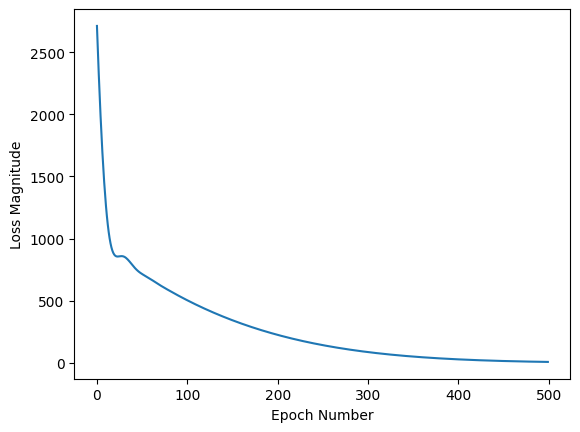

In [28]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [30]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 94ms/step
[[211.32527]]


In [32]:
print("These are the layer variables: {}".format(IO.get_weights()))

These are the layer variables: [array([[1.7215279]], dtype=float32), array([0.], dtype=float32)]


In [33]:
IO = tf.keras.layers.Dense(units=4, input_shape=[1])
I1 = tf.keras.layers.Dense(units=3, input_shape=[4])
I2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([IO, I1, I2])
model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the IO variables: {}".format(IO.get_weights()))
print("These are the I1 variables: {}".format(I1.get_weights()))
print("These are the I2 variables: {}".format(I2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 74ms/step
[[211.74744]]
1/1 [==============================] - 0s 56ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the IO variables: [array([[-0.284071  ,  0.43071875,  0.05696124, -0.5227882 ]],
      dtype=float32), array([-0.78147376,  3.4647925 , -3.2703326 , -3.451858  ], dtype=float32)]
These are the I1 variables: [array([[ 0.3715317 , -0.19102882, -0.32061064],
       [ 1.1463937 , -0.92674726,  0.63581353],
       [-0.24315509, -0.01604511, -0.93502665],
       [-0.22355303,  0.06461535, -0.8853361 ]], dtype=float32), array([ 3.379437 , -2.2205718,  3.4554558], dtype=float32)]
These are the I2 variables: [array([[ 0.8277087 ],
       [-0.34970868],
       [ 1.6249985 ]], dtype=float32), array([3.3670182], dtype=float32)]
